<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.640995  34.925259  90.872835  0.040214  157.479304   
      1.0    95.145814  36.678058  32.755933  0.172188  174.751993   
      2.0    60.443735  47.585077  69.899609  0.221711  188.150132   
      3.0    31.749471  39.444064  81.196086 -0.216651  162.172970   
      4.0    75.571924  28.101242  59.999407  0.088393  173.760965   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.655950  26.943522  93.650964 -0.354028  157.896408   
      56.0   64.963417  65.855822  20.013285  0.324358  161.156882   
      57.0   28.983831  65.042478  32.769278 -0.224001  136.571586   
      58.0   92.143225  62.373276  34.331948  0.130183  198.978632   
      59.0   23.025996  28.855452  24.490296 -0.128278   86.243466   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    157.441416  0.037888  
      1.0    174.518875  0.233118  
      2.0    187.904222  0.245910  
      3.0    162.385010 -0.212041  
      4.0    173.626361  0.134604  
...                 ...       ...  
999.0 55.0   158.257624 -0.361216  
      56.0   160.850682  0.306200  
      57.0   136.813914 -0.242328  
      58.0   198.857329  0.121302  
      59.0    86.410341 -0.166875  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.640995  34.925259  90.872835  0.040214  157.479304   
      1.0    95.145814  36.678058  32.755933  0.172188  174.751993   
      2.0    60.443735  47.585077  69.899609  0.221711  188.150132   
      3.0    31.749471  39.444064  81.196086 -0.216651  162.172970   
      4.0    75.571924  28.101242  59.999407  0.088393  173.760965   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.655950  26.943522  93.650964 -0.354028  157.896408   
      56.0   64.963417  65.855822  20.013285  0.324358  161.156882   
      57.0   28.983831  65.042478  32.769278 -0.224001  136.571586   
      58.0   92.143225  62.373276  34.331948  0.130183  198.978632   
      59.0   23.025996  28.855452  24.490296 -0.128278   86.243466   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    157.441416  0.037888  
      1.0    174.518875  0.233118  
      2.0    187.904222  0.245910  
      3.0    162.385010 -0.212041  
      4.0    173.626361  0.134604  
...                 ...       ...  
999.0 55.0   158.257624 -0.361216  
      56.0   160.850682  0.306200  
      57.0   136.813914 -0.242328  
      58.0   198.857329  0.121302  
      59.0    86.410341 -0.166875  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.640995  34.925259  90.872835  0.040214  157.479304   
      1.0    95.145814  36.678058  32.755933  0.172188  174.751993   
      2.0    60.443735  47.585077  69.899609  0.221711  188.150132   
      3.0    31.749471  39.444064  81.196086 -0.216651  162.172970   
      4.0    75.571924  28.101242  59.999407  0.088393  173.760965   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.655950  26.943522  93.650964 -0.354028  157.896408   
      56.0   64.963417  65.855822  20.013285  0.324358  161.156882   
      57.0   28.983831  65.042478  32.769278 -0.224001  136.571586   
      58.0   92.143225  62.373276  34.331948  0.130183  198.978632   
      59.0   23.025996  28.855452  24.490296 -0.128278   86.243466   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    157.441416  0.037888  
      1.0    174.518875  0.233118  
      2.0    187.904222  0.245910  
      3.0    162.385010 -0.212041  
      4.0    173.626361  0.134604  
...                 ...       ...  
999.0 55.0   158.257624 -0.361216  
      56.0   160.850682  0.306200  
      57.0   136.813914 -0.242328  
      58.0   198.857329  0.121302  
      59.0    86.410341 -0.166875  

[60000 rows x 7 columns]

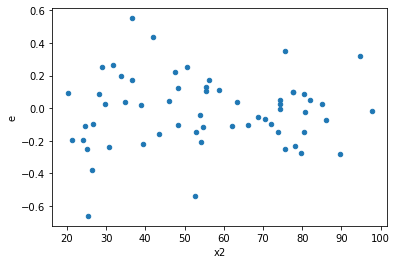

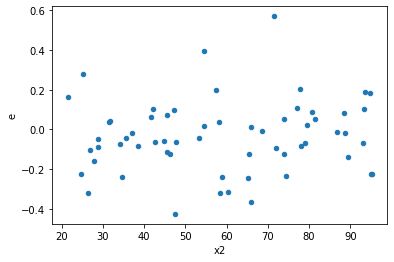

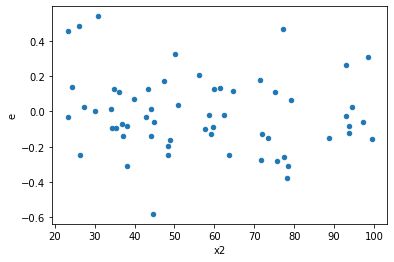

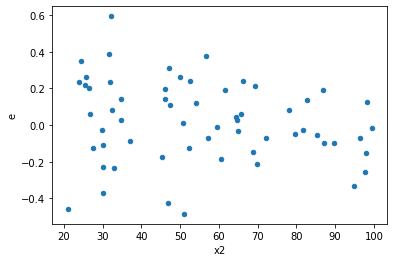

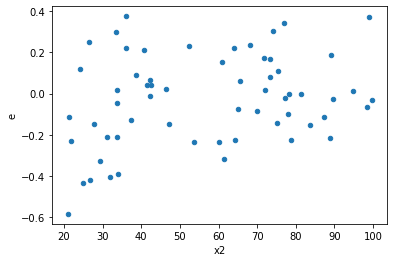

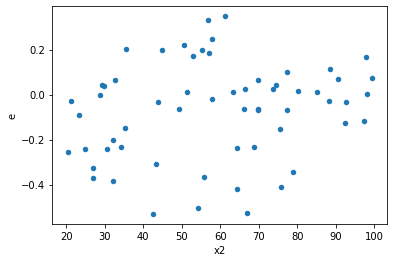

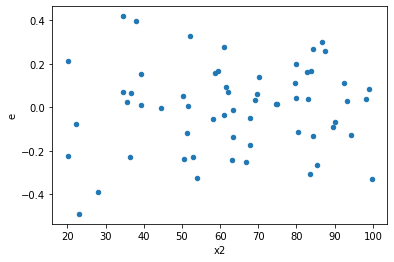

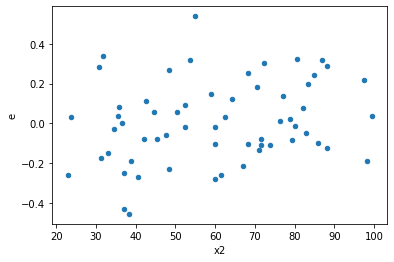

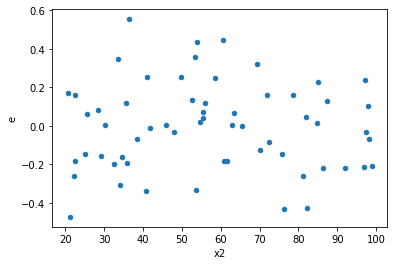

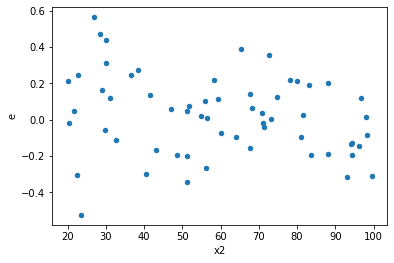

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,26.0,28.0,0.5752593103477568,1.1542114489555675,0.02212535809029834,0.04122183746269884,1.8631037425231116,0.1098480546865841,0.945075972656708,0.05492402734329205,Reject001=1 : Homoscedasticity
2.0,23.0,31.0,0.85690513347523,1.6746299317321731,0.037256744933705656,0.0540203203784572,1.449947398104169,0.3315185530332714,0.8342407234833643,0.1657592765166357,Reject001=1 : Homoscedasticity
4.0,33.0,21.0,0.9696859864238768,1.3643623834103635,0.02938442383102657,0.0649696373052554,2.21102301269746,0.05961323078548131,0.9701933846072593,0.029806615392740654,Reject001=1 : Homoscedasticity
6.0,30.0,24.0,0.8506974606061467,1.2607102492641038,0.02835658202020489,0.05252959371933766,1.852465635029948,0.12515804642176342,0.9374209767891183,0.06257902321088171,Reject001=1 : Homoscedasticity
8.0,30.0,24.0,1.5510792120295929,1.2892096973861866,0.051702640400986426,0.05371707072442444,1.038961846200017,0.9336274844304748,0.5331862577847626,0.4668137422152374,Reject001=1 : Homoscedasticity
11.0,23.0,31.0,0.43162051679772256,1.2461670466691592,0.01876610942598794,0.040198936989327715,2.1421028768839467,0.0486261464078086,0.9756869267960957,0.0243130732039043,Reject001=1 : Homoscedasticity
16.0,21.0,33.0,0.7481264260817226,1.5404445961334776,0.03562506790865346,0.04668013927677205,1.310317201260219,0.4755987617717916,0.7622006191141042,0.2377993808858958,Reject001=1 : Homoscedasticity
17.0,24.0,30.0,0.9731892549914679,1.3273146710614798,0.040549552291311165,0.044243822368716,1.091105076841907,0.8120470190944133,0.5939764904527933,0.4060235095472067,Reject001=1 : Homoscedasticity
18.0,33.0,21.0,0.9493182500339481,1.0523433269956817,0.028767219697998427,0.050111586999794365,1.741968376710421,0.1842861367041213,0.9078569316479393,0.09214306835206065,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,27.0,1.6261407921932334,1.077295224758285,0.06022743674789753,0.03989982313919574,0.6624858252927158,0.29085728173980663,Reject001=1 : Homoscedasticity
1.0,26.0,28.0,0.5752593103477568,1.1542114489555675,0.02212535809029834,0.04122183746269884,1.8631037425231116,0.1098480546865841,Reject001=1 : Homoscedasticity
2.0,23.0,31.0,0.85690513347523,1.6746299317321731,0.037256744933705656,0.0540203203784572,1.449947398104169,0.3315185530332714,Reject001=1 : Homoscedasticity
3.0,25.0,29.0,1.6149551930668902,0.9334517653653414,0.0645982077226756,0.0321879919091497,0.4982799530187414,0.08070639153119667,Reject001=1 : Homoscedasticity
4.0,33.0,21.0,0.9696859864238768,1.3643623834103635,0.02938442383102657,0.0649696373052554,2.21102301269746,0.05961323078548131,Reject001=1 : Homoscedasticity
5.0,33.0,21.0,1.4258296997248776,0.7420806889268111,0.04320696059772356,0.03533717566318148,0.817858399996858,0.5910698235671721,Reject001=1 : Homoscedasticity
6.0,30.0,24.0,0.8506974606061467,1.2607102492641038,0.02835658202020489,0.05252959371933766,1.852465635029948,0.12515804642176342,Reject001=1 : Homoscedasticity
7.0,39.0,15.0,1.6166374712008438,0.5259758766065725,0.04145224285130369,0.03506505844043817,0.8459146243599545,0.6497158771756469,Reject001=1 : Homoscedasticity
8.0,30.0,24.0,1.5510792120295929,1.2892096973861866,0.051702640400986426,0.05371707072442444,1.038961846200017,0.9336274844304748,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      949
Reject001=0 : Heteroscedasticity     51
Name: Result_test, dtype: int64